In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensor_utils as utils

np.random.seed(14159)
plt.style.use('default')
plt.rcParams["text.usetex"] = True

In [2]:
# Set parameters
c = np.array([1/6, 1/3, 1/2])
# c = np.array([1/4, 1/4, 1/4, 1/4])
eps_r = np.linspace(0.1, 1, 20)
sigma_r = np.tile(np.linspace(0.1, 5, 200), (eps_r.size, 1))*eps_r[:, None]

d = c.size
setting = "$\\mathbf{{c}} = {{{}}}^\\top$".format(list(np.round(c, 2)))

beta_r = np.zeros_like(sigma_r)
align_r = np.zeros((*sigma_r.shape, c.size))
mask = np.zeros_like(sigma_r, dtype=bool)
beta_pht = np.empty_like(eps_r)*np.nan
align_pht = np.empty((eps_r.size, d))*np.nan

In [3]:
# Compute asymptotic alignments
tol = 1e-5

for i, eps in enumerate(tqdm(eps_r)):
    gg = utils.stieltjes(sigma_r[i], c, eps)
    g, gi = gg['g'], gg['gi']
    mask[i] = (g.imag < tol)

    if np.any(mask[i]):
        
        rr = sigma_r[i, mask[i]]/eps+g[mask[i]].real
        rri = rr-gi[:, mask[i]].real
        beta_r[i, mask[i]] = np.sqrt(np.prod(rri, axis=0)/rr**(d-2))
        align_r[i, mask[i]] = np.sqrt(rr/rri).T

        beta_pht[i] = beta_r[i, mask[i]].min()
        align_pht[i] = align_r[i, mask[i]][0]
        if not np.all(mask[i]):
            beta_r[i, ~mask[i]] = np.linspace(0, beta_pht[i], np.sum(~mask[i]))
            sigma_r[i, ~mask[i]] = sigma_r[i, mask[i]].min()
            align_r[i, ~mask[i]] = 0

100%|██████████| 20/20 [00:00<00:00, 25.06it/s]


In [4]:
i = eps_r.size//2
setting_i = setting+"$\\quad \\varepsilon = {}$".format(np.round(eps_r[i], 2))

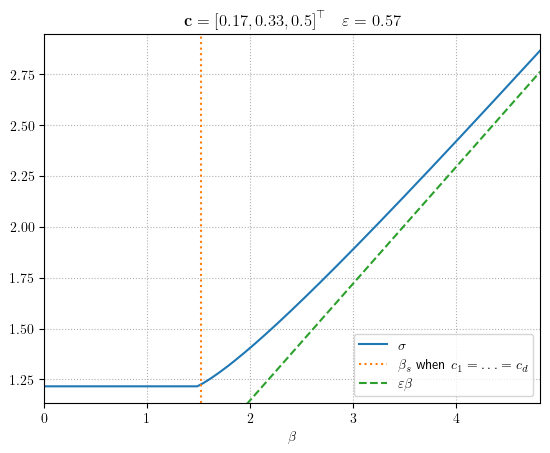

In [5]:
plt.plot(beta_r[i], sigma_r[i], color='C0', label="$\\sigma$")
plt.axvline(x=np.sqrt(((d-1)/(eps_r[i]*d))*((d-1)/(d-2))**(d-2)), color='C1', ls=':', label="$\\beta_s$ when $c_1 = \\dots = c_d$")
ylim = plt.ylim()
plt.plot(beta_r[i], eps_r[i]*beta_r[i], color='C2', ls='--', label="$\\varepsilon \\beta$")
plt.xlim(beta_r[i].min(), beta_r[i].max())
plt.ylim(*ylim)
plt.grid(ls=':')
plt.xlabel("$\\beta$")
plt.legend()
plt.title(setting_i);

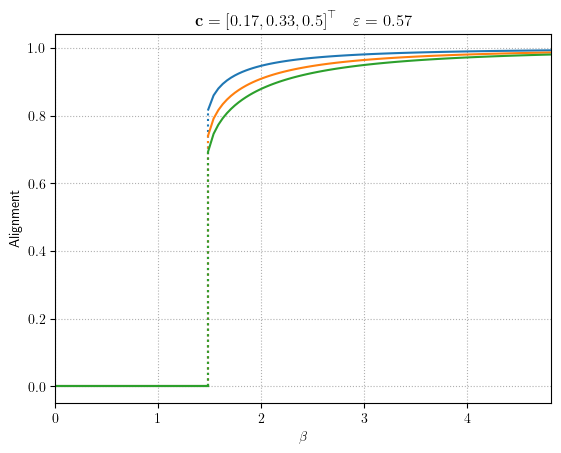

In [6]:
for j in range(d):
    col = "C"+str(j)
    plt.plot(beta_r[i, ~mask[i]], align_r[i, ~mask[i], j], c=col)
    plt.plot([beta_r[i, ~mask[i]][-1], beta_r[i, mask[i]][0]], [align_r[i, ~mask[i], j][-1], align_r[i, mask[i], j][0]], ls=':', c=col)
    plt.plot(beta_r[i, mask[i]], align_r[i, mask[i], j], c=col)
plt.grid(ls=':')
plt.xlim(beta_r[i].min(), beta_r[i].max())
plt.xlabel("$\\beta$")
plt.ylabel("Alignment")
plt.title(setting_i);

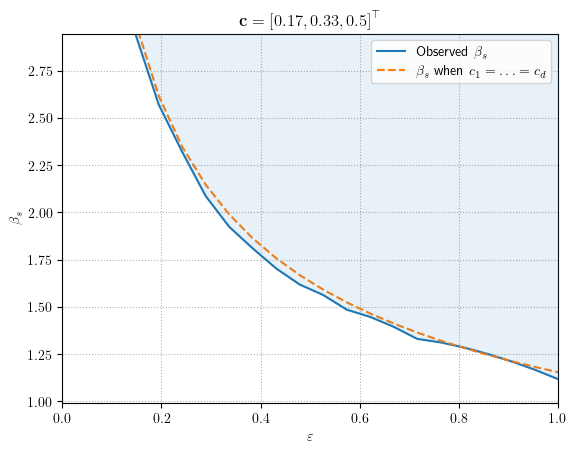

In [7]:
beta_pht_max = np.nanmax(beta_pht)
plt.plot(eps_r, beta_pht, color='C0', label="Observed $\\beta_s$")
plt.fill_between(eps_r, beta_pht, np.ones_like(beta_pht)*beta_pht_max, zorder=3, color='C0', alpha=0.1)
plt.plot(eps_r, np.sqrt(((d-1)/(eps_r*d))*((d-1)/(d-2))**(d-2)), color='C1', ls='--', label="$\\beta_s$ when $c_1 = \\dots = c_d$")
plt.grid(ls=':')
plt.xlim(0, 1)
plt.ylim(top=beta_pht_max)
plt.xlabel("$\\varepsilon$")
plt.ylabel("$\\beta_s$")
plt.legend()
plt.title(setting);

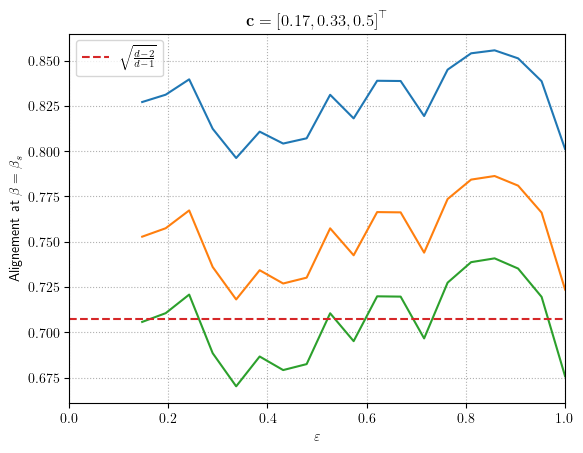

In [8]:
plt.plot(eps_r, align_pht)
plt.axhline(y=np.sqrt((d-2)/(d-1)), ls='--', color='C'+str(d), label="$\\sqrt{\\frac{d-2}{d-1}}$")
plt.grid(ls=':')
plt.xlim(0, 1)
plt.xlabel("$\\varepsilon$")
plt.ylabel("Alignement at $\\beta = \\beta_s$")
plt.legend()
plt.title(setting);